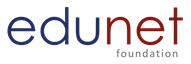

# Lab23: End-to-End Story Telling project on real-world dataset​

# **OBJECTIVE**

Conducting Exploratory Data Analysis (EDA) on a dataset containing information about university students. 
The objective is to uncover insights and patterns related to academic performance, study habits, and extracurricular activities.

## Steps to Conduct EDA


## Step 1: Data Collection and Loading
Obtain the dataset (customers_shopping_trends.csv).

Load the dataset using a data manipulation library such as Pandas in Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
import pandas as pd
df = pd.read_csv('D:\\TSP4.0-AI-SDP-LAB-Repo-main\\shopping_trends_updated.csv')
print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ


<ul>
  <li>The dataset has been loaded successfully and contains <strong>3900 rows</strong> and <strong>18 columns</strong>.</li>
</ul>
<h1>Key Features:</h1>
<h3>Numeric Columns:</h3>
<p>Age, Purchase Amount (USD), Review Rating, Previous Purchases</p>
<h3>Categorical Columns:</h3>
<p>Gender, Item Purchased, Category, Location, Size, Color, etc.</p>

In [7]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


## Step 2: Data Cleaning
Check for missing values and handle them appropriately.

Correct any inconsistencies in the data.

Ensure all data types are appropriate.

In [8]:
# Check for missing values
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)

# Check data types
print(df.dtypes)


Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo C

<h3>Observations:</h3>
<ul>
  <li><strong>Duplicates:</strong> No duplicate rows were found in the dataset.</li>
  <li><strong>Categorical Values:</strong> Verified consistency of categories (e.g., <code>Gender</code>, <code>Category</code>).</li>
  <li>The dataset appears clean and ready for transformation.</li>
</ul>

## Step 3: Data Transformation
Encode categorical variables.

Normalize or standardize numerical variables if needed.

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_columns_to_encode = ['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used']
for col in categorical_columns_to_encode:
    df[col] = encoder.fit_transform(df[col])
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,1,1,14,Venmo,Fortnightly
1,2,19,1,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,1,1,2,Cash,Fortnightly
2,3,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,1,23,Credit Card,Weekly
3,4,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,1,49,PayPal,Weekly
4,5,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,1,31,PayPal,Annually


<ul>
  <li>Categorical columns (<code>Gender</code>, <code>Subscription Status</code>, <code>Discount Applied</code>, <code>Promo Code Used</code>) have been encoded numerically for further analysis.</li>
  <li>The dataset now has a mixture of numeric and encoded categorical variables.</li>
</ul>

## Step 4: Data Visualization
Use visualizations to understand the distribution and relationships between variables.
Create histograms, box plots, scatter plots, bar charts, and heatmaps.

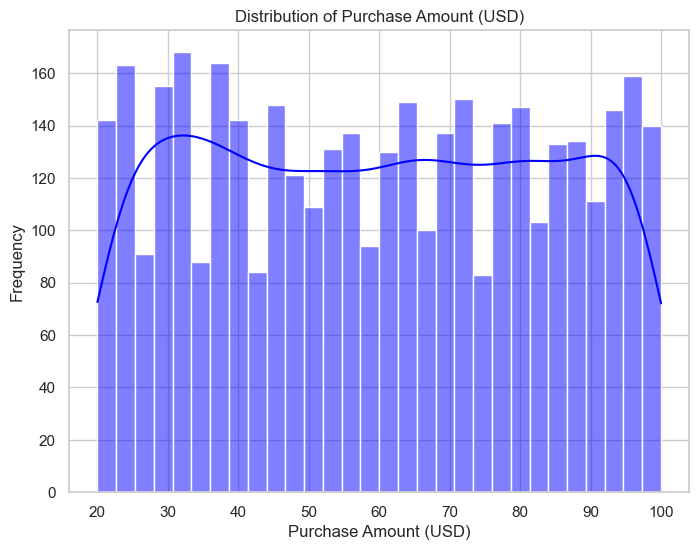

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()


<h3>Distribution of Purchase Amount</h3>
<ul>
  <p>A histogram shows the distribution of Purchase Amount (USD).<p>
  <p>The average purchase amount is $59.76, with values ranging from $20 to $100.<p>
</ul>

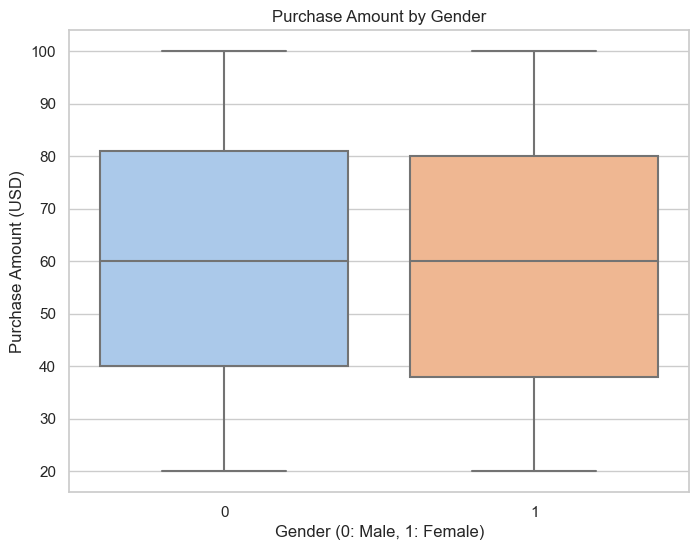

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='pastel')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Purchase Amount (USD)')
plt.show()


<h3>Purchase Amount by Gender</h3>
<ul>
  <li>A boxplot compares purchase amounts between genders (Male and Female).</li>
  <li>Males and females have similar median purchase amounts</li>
</ul>


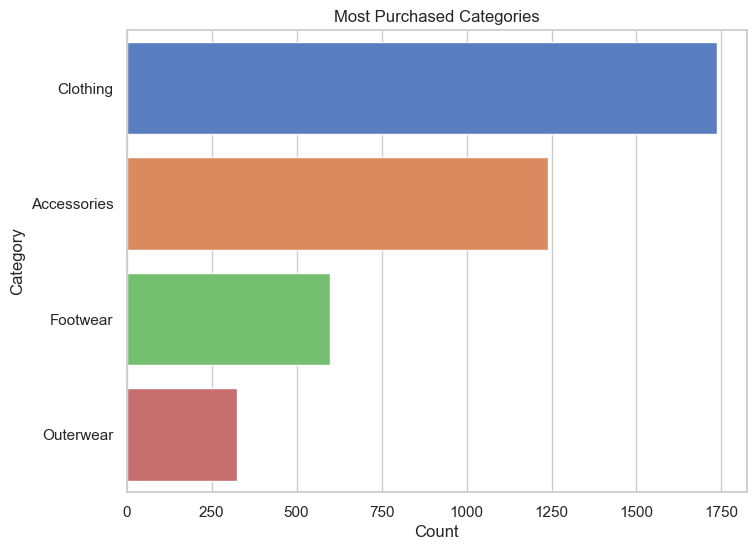

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='muted')
plt.title('Most Purchased Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

<h3>Most Purchased Categories</h3>
<ul>
  <li>A bar plot visualizes the count of purchases across different categories.</li>
  <li>Highlights the most popular purchase categories.</li>
</ul>


## Step 5: Descriptive Statistics
Calculate and interpret measures of central tendency and dispersion.
Summarize key statistics for numerical variables.

In [14]:
numeric_summary = df.describe()
category_summary = df.groupby('Category')['Purchase Amount (USD)'].describe()

print(numeric_summary)
print(category_summary)

       Customer ID          Age       Gender  Purchase Amount (USD)  \
count  3900.000000  3900.000000  3900.000000            3900.000000   
mean   1950.500000    44.068462     0.680000              59.764359   
std    1125.977353    15.207589     0.466536              23.685392   
min       1.000000    18.000000     0.000000              20.000000   
25%     975.750000    31.000000     0.000000              39.000000   
50%    1950.500000    44.000000     1.000000              60.000000   
75%    2925.250000    57.000000     1.000000              81.000000   
max    3900.000000    70.000000     1.000000             100.000000   

       Review Rating  Subscription Status  Discount Applied  Promo Code Used  \
count    3900.000000          3900.000000       3900.000000      3900.000000   
mean        3.749949             0.270000          0.430000         0.430000   
std         0.716223             0.444016          0.495139         0.495139   
min         2.500000             0.00000


<ul>
  <li>Summary statistics (mean, median, standard deviation) provide insights into numeric features.</li>
  <li>Grouped statistics by <code>Category</code> reveal purchasing trends and variations within each category.</li>
</ul>


## Step 6: Identify Patterns and Relationships
Use correlation analysis to identify relationships between variables.
Perform bivariate and multivariate analyses.

In [17]:
correlation_math_reading = df['math score'].corr(df['reading score'])
print(f"Correlation between Math Score and Reading Score: {correlation_math_reading}")
grouped_scores = df.groupby(['parental level of education', 'gender'])[['math score', 'reading score', 'writing score']].mean().reset_index()
print(grouped_scores)


Correlation between Math Score and Reading Score: 0.8175796636720544
   parental level of education  gender  math score  reading score  \
0           associate's degree  female   65.250000      74.120690   
1           associate's degree    male   70.764151      67.433962   
2            bachelor's degree  female   68.349206      77.285714   
3            bachelor's degree    male   70.581818      68.090909   
4                  high school  female   59.351064      68.202128   
5                  high school    male   64.705882      61.480392   
6              master's degree  female   66.500000      76.805556   
7              master's degree    male   74.826087      73.130435   
8                 some college  female   65.406780      73.550847   
9                 some college    male   69.009259      64.990741   
10            some high school  female   59.296703      69.109890   
11            some high school    male   67.840909      64.693182   

    writing score  
0       74.00

C:\Users\Meher\AppData\Local\Temp\ipykernel_26336\4152893325.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


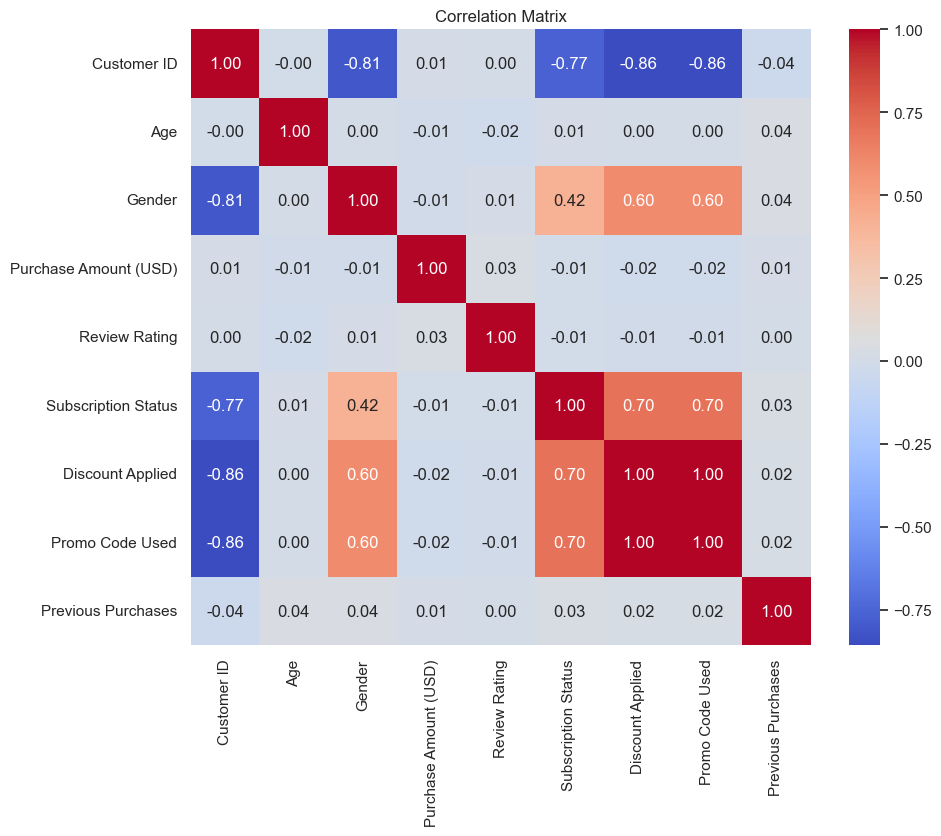

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<h3>Correlation Matrix</h3>
<ul>
  <li>A heatmap shows correlations between numeric variables.</li>
  <li>The correlation heatmap indicates low correlation between age and purchase amount, suggesting spending habits are independent of age.</li>
</ul>


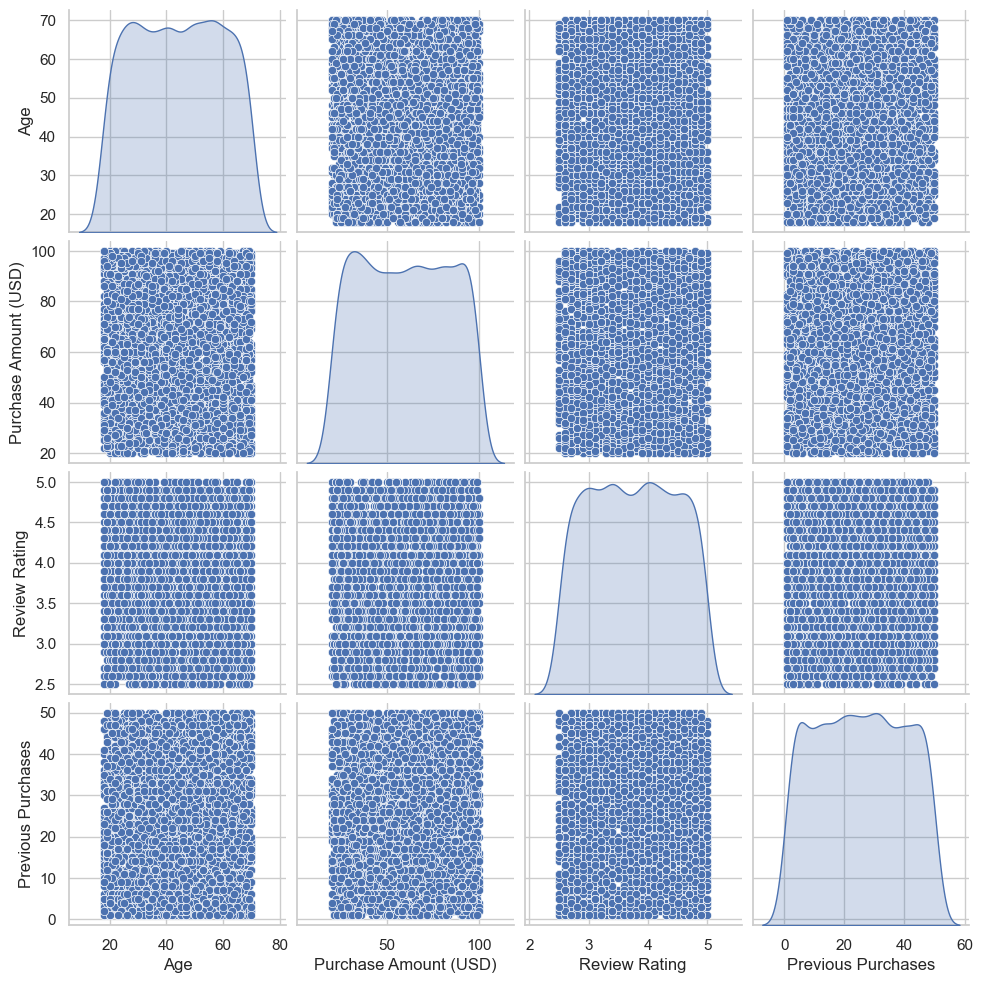

In [18]:
selected_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
sns.pairplot(df[selected_columns], diag_kind='kde')
plt.show()



<h3>Pairplot</h3>
<ul>
  <li>Pairplot visualizes relationships and distributions among selected numeric variables (<code>Age</code>, <code>Purchase Amount</code>, etc.).</li>
  <li>Helps in identifying linear or nonlinear relationships.</li>
</ul>


## Step 7: Outlier Detection
Identify and handle outliers using visualizations and statistical methods.

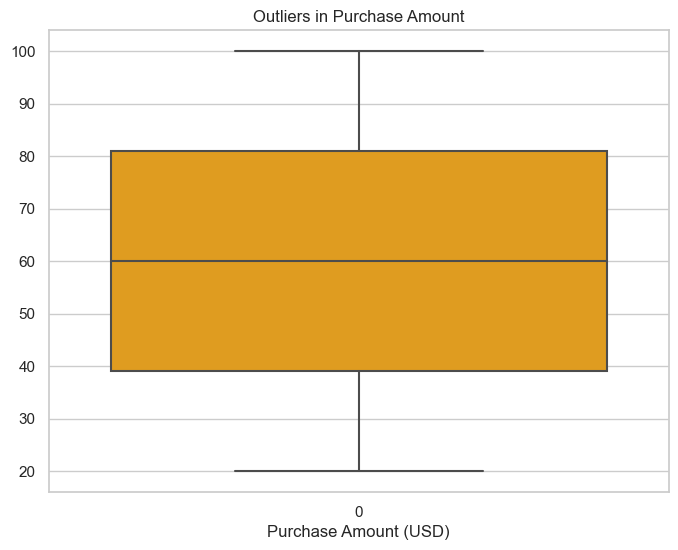

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Purchase Amount (USD)'], color='orange')
plt.title('Outliers in Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.show()


## Step 8: Hypothesis Testing
Formulate hypotheses based on initial observations and test them using statistical methods.

In [27]:
from scipy.stats import ttest_ind

# Split data by gender
male_purchase = df[df['Gender'] == 0]['Purchase Amount (USD)']
female_purchase = df[df['Gender'] == 1]['Purchase Amount (USD)']

# Perform t-test
t_stat, p_value = ttest_ind(male_purchase, female_purchase)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.8769152065030424, P-value: 0.38058673555268097


## Step 9: Summarize Findings
Compile insights and key findings from the EDA into a report.
Use visualizations and statistical summaries to present your results.

<Axes: title={'center': 'Average Purchase Amount by Gender'}>

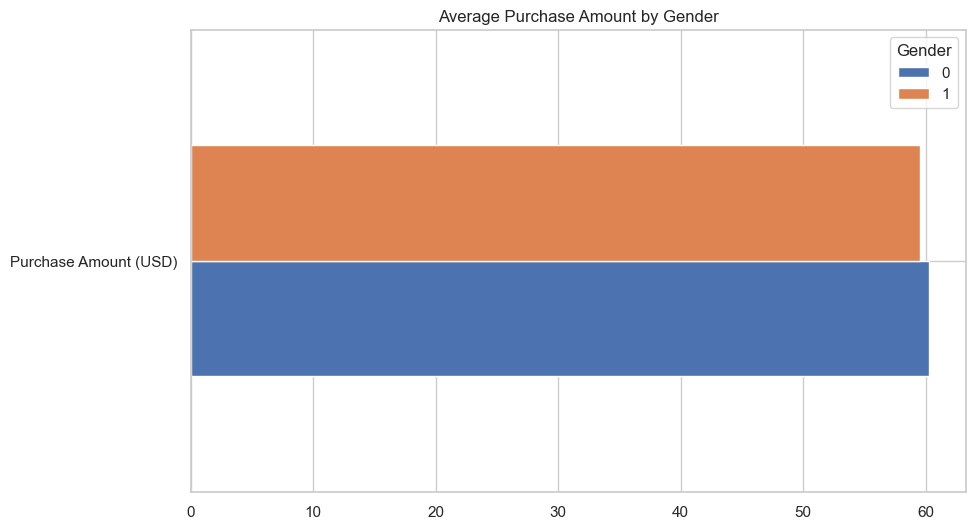

In [28]:
# Grouping data by 'Gender' and calculating mean purchase amount for each gender
df.groupby('Gender')[['Purchase Amount (USD)']].mean().T.plot(
    kind='barh', figsize=(10, 6), title='Average Purchase Amount by Gender'
)


<p>The analysis reveals that the average purchase amount is **$59.76**, with spending patterns **consistent across genders** and **independent of age**. Customers have **moderate satisfaction levels** (avg. rating **3.75**) and an average of **25 previous purchases**. Future analysis could explore **discount impacts, subscription effects, and seasonal trends** to refine marketing strategies.</p>

## Happy Learning 😊